In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [80]:
try:
    df = pd.read_csv('/content/laptop_price.csv', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv('/content/laptop_price.csv', encoding='cp1252')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [82]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,laptop_ID,int64,1303,0,"[1, 867, 885, 884, 883, 882, 881, 880, 879, 878]",0
1,Company,object,19,0,"[Dell, Lenovo, HP, Asus, Acer, MSI, Toshiba, A...",0
2,Product,object,618,0,"[XPS 13, Inspiron 3567, 250 G6, Legion Y520-15...",0
3,TypeName,object,6,0,"[Notebook, Gaming, Ultrabook, 2 in 1 Convertib...",0
4,Inches,float64,18,0,"[15.6, 14.0, 13.3, 17.3, 12.5, 11.6, 12.0, 13....",0
5,ScreenResolution,object,40,0,"[Full HD 1920x1080, 1366x768, IPS Panel Full H...",0
6,Cpu,object,118,0,"[Intel Core i5 7200U 2.5GHz, Intel Core i7 770...",0
7,Ram,object,9,0,"[8GB, 4GB, 16GB, 6GB, 12GB, 2GB, 32GB, 24GB, 6...",0
8,Memory,object,39,0,"[256GB SSD, 1TB HDD, 500GB HDD, 512GB SSD, 128...",0
9,Gpu,object,110,0,"[Intel HD Graphics 620, Intel HD Graphics 520,...",0


Column 'laptop_ID' is not categorical.
Column 'Company' is not categorical.
Column 'Product' is not categorical.
Column 'Inches' is not categorical.
Column 'ScreenResolution' is not categorical.
Column 'Cpu' is not categorical.
Column 'Memory' is not categorical.
Column 'Gpu' is not categorical.
Column 'Weight' is not categorical.
Column 'Price_euros' is not categorical.


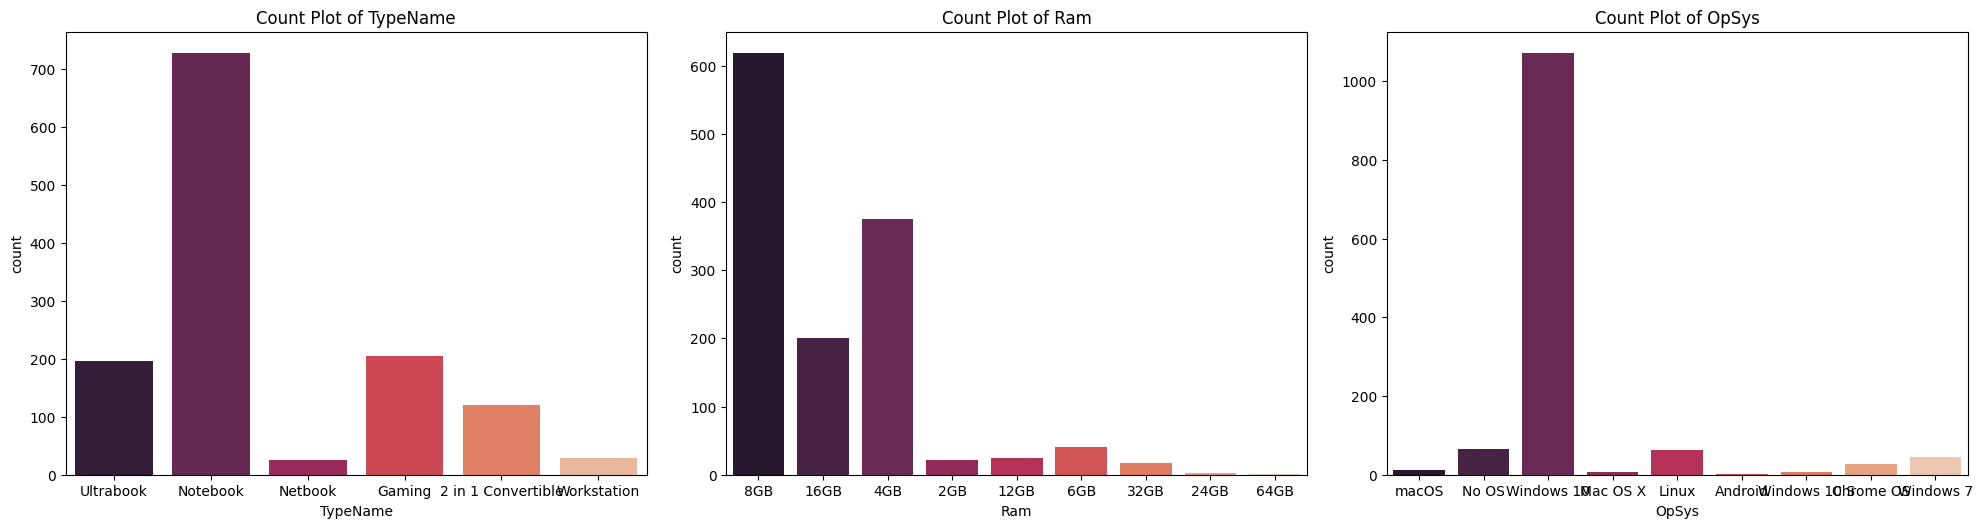

In [83]:
cleaner.categorical_plot(df,df.columns,10)

Column 'laptop_ID' is not countinuous.
Column 'Company' is not countinuous.
Column 'Product' is not countinuous.
Column 'TypeName' is not countinuous.
Column 'ScreenResolution' is not countinuous.
Column 'Cpu' is not countinuous.
Column 'Ram' is not countinuous.
Column 'Memory' is not countinuous.
Column 'Gpu' is not countinuous.
Column 'OpSys' is not countinuous.
Column 'Weight' is not countinuous.


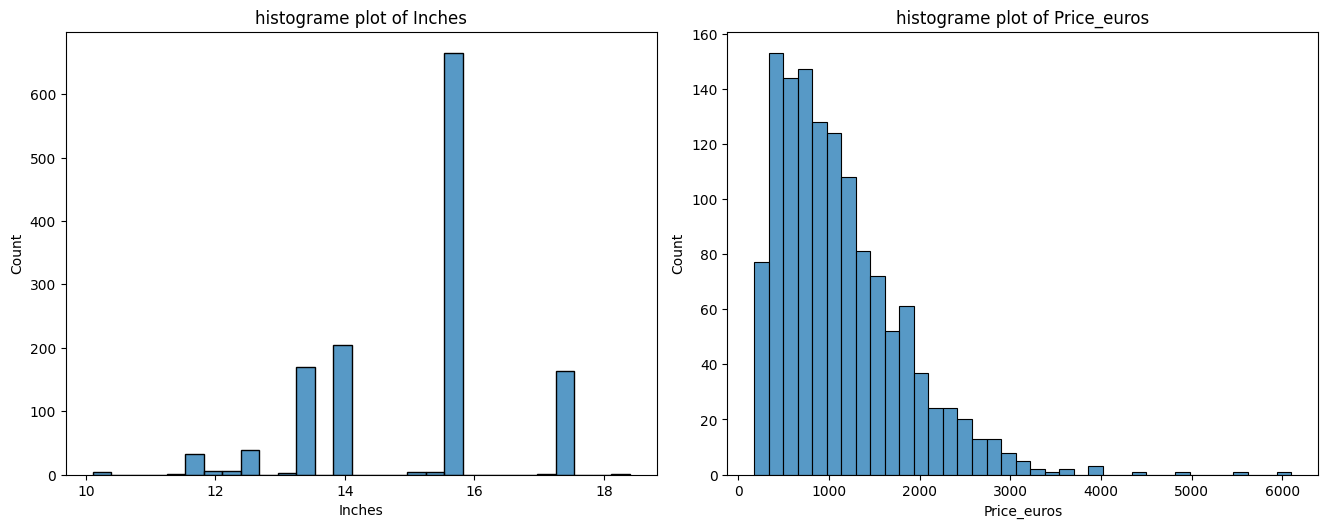

In [84]:
cleaner.continuous_plot(df,df.columns,10)

Price_euros right skewed

In [85]:
df.drop(columns=['laptop_ID'], inplace=True)

In [86]:
df.duplicated().sum()

28

In [87]:
df.drop_duplicates(inplace=True)

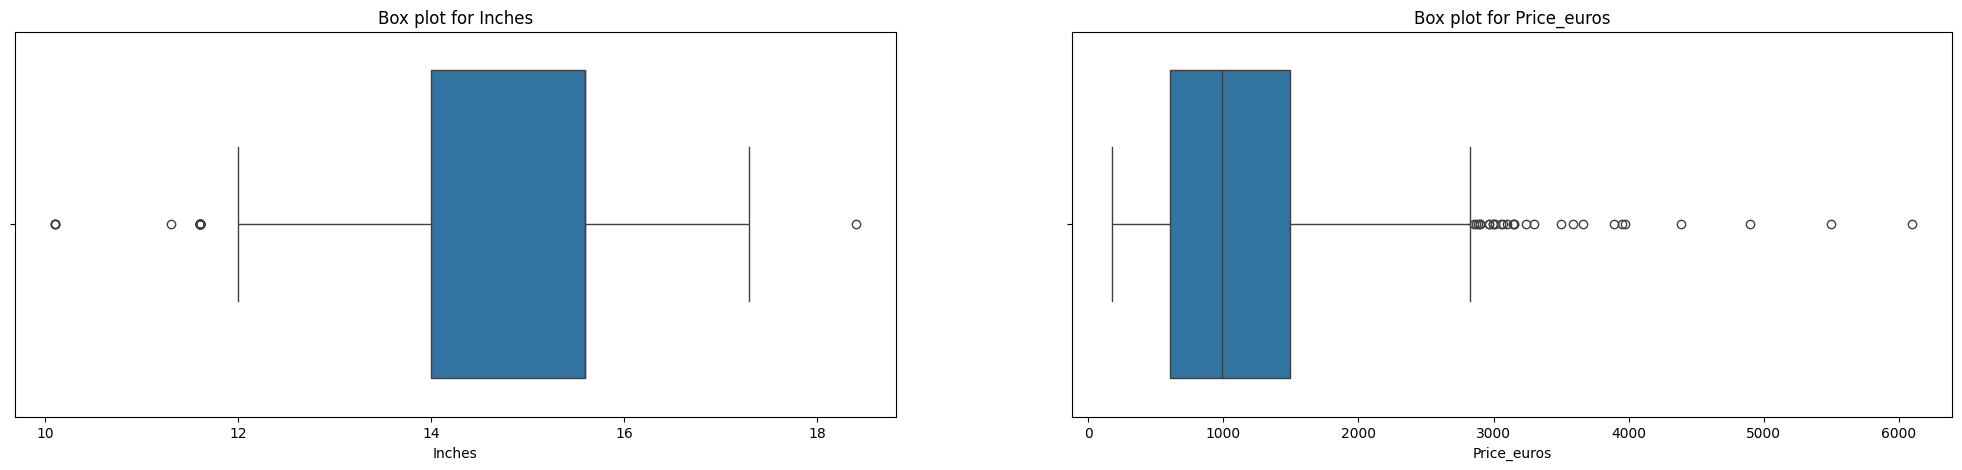

In [88]:
cleaner.boxplot_numeric_columns(df)

In [89]:
cleaner.remove_outliers_iqr_countinuous(df,['Price_euros','Inches'])

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1205,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1206,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1207,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1208,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


reduced to 1210 rows

In [90]:
df.skew(numeric_only=True).sort_values(ascending=False)

Price_euros    1.511147
Inches        -0.438622
dtype: float64

Price euros is right skewed

In [91]:
df['Price_euros']=np.log(df['Price_euros'])

In [92]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [93]:
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'], drop_first=True,dtype=int)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number'])
df[numeric_columns.columns] = scaler.fit_transform(df[numeric_columns.columns])

In [95]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [96]:
x = df.drop(['Price_euros', 'Product'], axis=1)
y = df['Price_euros']

In [99]:
x

,Inches,Ram,Weight,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,-1.205746,-0.086499,-1.002380,7.727502,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,-0.515885,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,-2.148660,-0.079461,-0.191273,9.852762
1,-1.205746,-0.086499,-1.047227,7.727502,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,-0.515885,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,-2.148660,-0.079461,-0.191273,9.852762
2,0.403873,-0.086499,-0.269871,-0.129408,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,1.938418,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,4.279975,-2.148660,-0.079461,-0.191273,-0.101494
3,0.263906,1.483418,-0.314718,7.727502,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,-0.515885,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,-2.148660,-0.079461,-0.191273,9.852762
4,-1.205746,-0.086499,-1.002380,7.727502,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,-0.515885,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,-2.148660,-0.079461,-0.191273,9.852762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,-0.715862,-0.871458,-0.359566,-0.129408,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,-0.515885,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,0.465406,-0.079461,-0.191273,-0.101494
1271,-1.205746,1.483418,-1.107024,-0.129408,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,-0.515885,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,0.465406,-0.079461,-0.191273,-0.101494
1272,-0.715862,-1.263937,-0.808041,-0.129408,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,-0.515885,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,0.465406,-0.079461,-0.191273,-0.101494
1273,0.403873,-0.478979,0.223452,-0.129408,-0.367902,-0.048564,-0.543812,-0.048564,-0.048564,1.938418,...,-0.062746,-0.028017,-0.147087,-0.218308,-0.079461,-0.233646,0.465406,-0.079461,-0.191273,-0.101494


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
lin= LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [101]:
lin.score(x_train,y_train)

0.9252124341950851

In [102]:
lin.score(x_test,y_test)

-4.845292949079717e+27

In [103]:
y_pred_test=lin.predict(x_test)
y_pred_train=lin.predict(x_train)

In [104]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [105]:
print(mse_test)
print(mse_train)

4.336743496755225e+27
0.07657186152586123


In [108]:
DT = DecisionTreeRegressor(max_depth=4,random_state=42)
DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [109]:
DT.score(x_train,y_train)

0.7319722110382323

In [110]:
DT.score(x_test,y_test)

0.690231878060728

In [111]:
y_pred_test=DT.predict(x_test)
y_pred_train=DT.predict(x_train)

In [112]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [113]:
print(mse_test)
print(mse_train)

0.27725565872696534
0.27442244603867694


In [119]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 15, 20]
}

In [120]:
dtr = DecisionTreeRegressor(random_state=42)
model = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [121]:
model.best_params_

{'max_depth': None, 'min_samples_split': 15}

In [122]:
best_model = model.best_estimator_
y_pred_test = best_model.predict(x_test)
y_pred_train = best_model.predict(x_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

In [123]:
print(mse_test)
print(mse_train)

0.1873399432417596
0.059852926155450445


In [124]:
best_model.score(x_train,y_train)

0.9415417809588493

In [125]:
best_model.score(x_test,y_test)

0.7906915853452133

DT overfits

In [127]:
rf= RandomForestRegressor(random_state=42,n_estimators=50)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [128]:
rf.score(x_train,y_train)

0.9810334618656804

In [129]:
rf.score(x_test,y_test)

0.876378797058496

In [130]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

In [131]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train=mean_squared_error(y_train,y_pred_train)

In [132]:
print(mse_test)
print(mse_train)

0.11064624028965092
0.019419045345511816
